In [1]:
import numpy as np 
import pandas as pd 
from glob import glob 
import os 
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

annot_csv=Path("D:/OAK_D_img/oak-d-camera/bbox_package/week4/week4.csv")#D:/00_NCSU/00_Resources/00_Datasets/PartTimePSA/OPENCV/annotations/week4/week4.csv")
data_dir=Path("D:/OAK_D_img/oak-d-camera/weeks/week4/")
RGB_IMAGE_SIZE = (1080,1920)
DEPTH_IMAGE_SIZE = (720,1280)

resize_RGB = (512,910)
resize_depth = (599,1065)

In [2]:
df=pd.read_csv(annot_csv, header=0, names=['no', 'date', 'time', 'week', 'row', 'stop', 'image', 'speciesid', 'commonname'], index_col=0)

In [3]:
df['annotation_file']=df['image'].apply(lambda x: os.path.join(annot_csv.parent.absolute(),Path(x.replace('.png', '.txt'))))
print(df['annotation_file'][1])
df['mask_dir']=df['image'].apply(lambda x: os.path.join(annot_csv.parent.absolute(),Path(x.replace('_rgb.png', '_mask.png'))))
print(df['mask_dir'][1])
df['image_file']=df['image'].apply(lambda x: os.path.join(annot_csv.parent.absolute(),Path(x)))
print(df['image_file'][1])

D:\OAK_D_img\oak-d-camera\bbox_package\week4\wk4_row1_stop1_20210414_101652_rgb.txt
D:\OAK_D_img\oak-d-camera\bbox_package\week4\wk4_row1_stop1_20210414_101652_mask.png
D:\OAK_D_img\oak-d-camera\bbox_package\week4\wk4_row1_stop1_20210414_101652_rgb.png


In [4]:
def create_image_path(x):
    #print(Path(x[10]))
    #print(os.path.join(data_dir,Path(x[3].replace('row', '')+'\\'+x[4]+'\\')))
    return os.path.join(data_dir,Path(x[3].replace('row', '')+'\\'+x[4]+'\\'))
def get_disp_map_path(x):
    return sorted(Path(x[11]).rglob('*map30.png'))[-1]
def get_depth_path(x): 
    return sorted(Path(x[11]).rglob('*30.npy'))[-1]

In [5]:
df['image_dir']=df.apply(create_image_path, axis=1)
#print(df['image_dir'])
df['depth_dir']=df.apply(get_depth_path, axis=1)
print(df['depth_dir'][1])
df['disp_map_dir']=df.apply(get_disp_map_path,axis=1)
df['annotations']=df['annotation_file'].apply(lambda x: np.loadtxt(x))


D:\OAK_D_img\oak-d-camera\weeks\week4\1\stop1\2021_04_14_10_17_08\depth30.npy


In [6]:
df.head()

,date,time,week,row,stop,image,speciesid,commonname,annotation_file,mask_dir,image_file,image_dir,depth_dir,disp_map_dir,annotations
no,,,,,,,,,,,,,,,
0,20210415,153241,wk4,row9,stop16,wk4_row9_stop16_20210415_153241_rgb.png,5.0,grass,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\weeks\week4\9\stop16,D:\OAK_D_img\oak-d-camera\weeks\week4\9\stop16...,D:\OAK_D_img\oak-d-camera\weeks\week4\9\stop16...,"[5.0, 0.399219, 0.565278, 0.364063, 0.675]"
1,20210414,101652,wk4,row1,stop1,wk4_row1_stop1_20210414_101652_rgb.png,0.0,clover,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\weeks\week4\1\stop1,D:\OAK_D_img\oak-d-camera\weeks\week4\1\stop1\...,D:\OAK_D_img\oak-d-camera\weeks\week4\1\stop1\...,"[0.0, 0.465885, 0.588889, 0.170313, 0.259259]"
2,20210415,152931,wk4,row9,stop12,wk4_row9_stop12_20210415_152931_rgb.png,5.0,grass,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\weeks\week4\9\stop12,D:\OAK_D_img\oak-d-camera\weeks\week4\9\stop12...,D:\OAK_D_img\oak-d-camera\weeks\week4\9\stop12...,"[5.0, 0.383333, 0.470833, 0.315625, 0.737963]"
3,20210415,150825,wk4,row8,stop9,wk4_row8_stop9_20210415_150825_rgb.png,1.0,sunflower,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\weeks\week4\8\stop9,D:\OAK_D_img\oak-d-camera\weeks\week4\8\stop9\...,D:\OAK_D_img\oak-d-camera\weeks\week4\8\stop9\...,"[1.0, 0.479167, 0.531019, 0.309375, 0.517593]"
4,20210414,124844,wk4,row7,stop6,wk4_row7_stop6_20210414_124844_rgb.png,2.0,cowpea,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\weeks\week4\7\stop6,D:\OAK_D_img\oak-d-camera\weeks\week4\7\stop6\...,D:\OAK_D_img\oak-d-camera\weeks\week4\7\stop6\...,"[2.0, 0.454688, 0.538889, 0.54375, 0.590741]"


In [7]:
from scipy import ndimage, misc

def open_depth_slices(x): 
    label=x['annotations']
    #H, W=(1080*0.57, 1920*0.57)
    H, W=(1080*0.474, 1920*0.474)
    obj =[int((label[1] - label[3]/2)* W), int((label[2] - label[4] / 2)* H), int((label[1] + label[3] / 2) * W), int((label[2] + label[4]/ 2) * H)]
    x1,y1,x2,y2 = obj
    result = ndimage.zoom(np.load(x['depth_dir']), 0.832)
    #return np.load(x['depth_dir'])[y1+72:y2+72,x1+119:x2+119]
    return result[y1+60:y2+60,x1+115:x2+115]


def open_masks(x):
    H, W=(1080*0.474, 1920*0.474)
    m = cv2.cvtColor(cv2.imread(x['mask_dir']),cv2.COLOR_BGR2GRAY)
    label = x['annotations']
    width = int(m.shape[1] *0.474)
    height = int(m.shape[0] *0.474)
    dsize = (width, height)
    output = cv2.resize(m, dsize)
    obj =[int((label[1] - label[3]/2)* W), int((label[2] - label[4] / 2)* H), int((label[1] + label[3] / 2) * W), int((label[2] + label[4]/ 2) * H)]
    x1,y1,x2,y2 = obj
    return output[y1:y2,x1:x2]

def open_dispmaps(x):
    label=x['annotations']
    H, W=(1080*0.474, 1920*0.474)
    dsize = (round(1280*0.832), round(720*0.832))
    obj =[int((label[1] - label[3]/2)* W), int((label[2] - label[4] / 2)* H), int((label[1] + label[3] / 2) * W), int((label[2] + label[4]/ 2) * H)]
    x1,y1,x2,y2 = obj
    dmap=cv2.imread(str(x['disp_map_dir']))
    dmap=cv2.resize(dmap,dsize)
    #return dmap[y1+60:y2+60,x1+115:x2+115]
    return dmap[y1+60:y2+60,x1+115:x2+115]


def open_rgb(x):
    H, W=(1080*0.474, 1920*0.474)
    m = cv2.cvtColor(cv2.imread(x['image_file']),cv2.COLOR_BGR2RGB)
    label = x['annotations']
    width = int(m.shape[1] *0.474)
    height = int(m.shape[0] *0.474)
    dsize = (width, height)
    output = cv2.resize(m, dsize)
    obj =[int((label[1] - label[3]/2)* W), int((label[2] - label[4] / 2)* H), int((label[1] + label[3] / 2) * W), int((label[2] + label[4]/ 2) * H)]
    x1,y1,x2,y2 = obj
    return output[y1:y2,x1:x2]



def create_histograms(x):
    #return np.histogram(x['depth_slices'],list(range(0,65535,50)))
    return np.histogram(x['depth_slices'],list(range(0,65535,50)))

def create_histograms_maps(x):
    #return np.histogram(x['depth_slices'],list(range(0,65535,50)))
    return np.histogram(x['disp_maps'],list(range(0,255,1)))

In [8]:
df['depth_slices']=df.apply(open_depth_slices, axis=1)
df['mask']=df.apply(open_masks, axis=1)
df['disp_maps']=df.apply(open_dispmaps, axis=1)
df['histograms']=df.apply(create_histograms, axis=1)
df['histograms_map']=df.apply(create_histograms_maps, axis=1)
df['origin'] =df.apply(open_rgb, axis=1) 


In [9]:
test_img=7
df['mask'][test_img].shape, df['depth_slices'][test_img].shape, df['disp_maps'][test_img].shape, df['origin'][test_img].shape

((158, 160), (158, 160), (158, 160, 3), (158, 160, 3))

In [10]:
df['disp_maps'][test_img].max()

255

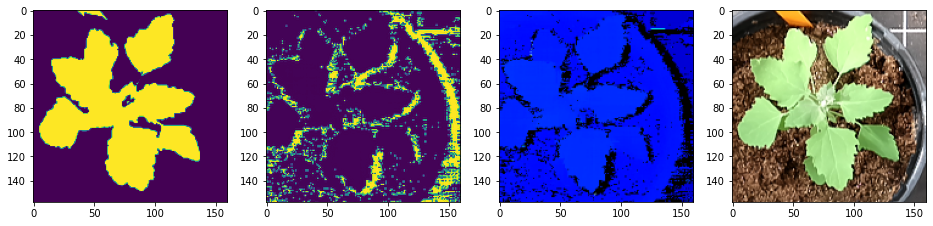

In [11]:
plt.figure(figsize=(16,16)); 
plt.subplot(141);plt.imshow(df['mask'][test_img]); 
plt.subplot(142); plt.imshow(df['depth_slices'][test_img]); 
plt.subplot(143); plt.imshow(df['disp_maps'][test_img])
plt.subplot(144); plt.imshow(df['origin'][test_img])


In [12]:
import imageio
from pathlib import Path
import pandas as pd
import sys
import cv2
import numpy as np



###VI funtions
def make_exg(x):
    # rgb_img: np array in [RGB] channel order
    # EXG = 2 * G - R - B
    img = x['origin']#.astype(float)
    width = int(img.shape[1])
    height = int(img.shape[0])
    dsize = (width, height)
    mask = cv2.resize(x['mask'], dsize)
    img[:, :, 0:2][mask==0] = 0
    blue = img[:,:,2]
    green = img[:,:,1]
    red = img[:,:,0]
    exg = 2*green - red - blue
    exg = np.where(exg < 0, 0, exg).astype('uint8') # Thresholding removes low negative values (noise)
    return exg


def make_ndi(x):
    # rgb_img: np array in [RGB] channel order
    # NDI = 128 * (((G - R) / (G + R)) + 1)
    img = x['origin']#.astype(float)
    width = int(img.shape[1])
    height = int(img.shape[0])
    dsize = (width, height)
    mask = cv2.resize(x['mask'], dsize)
    img[:, :, 0:2][mask==0] = 0
    blue = img[:,:,2]
    green = img[:,:,1]
    red = img[:,:,0]
    gminr = (green - red)
    gplusr = (green + red)
    gdivr = np.true_divide(gminr, gplusr, where=gplusr!=0) # /, out=np.zeros_like(gminr),
    ndi = 128 * (gdivr  + 1)
    return ndi


def make_exr(x):
    # rgb_img: np array in [RGB] channel order
    # EXR = 1.4 * R - G
    img = x['origin']#.astype(float)
    width = int(img.shape[1])
    height = int(img.shape[0])
    dsize = (width, height)
    mask = cv2.resize(x['mask'], dsize)
    img[:, :, 0:2][mask==0] = 0
    blue = img[:,:,2]
    green = img[:,:,1]
    red = img[:,:,0]
    exr = 1.4 * red - green
    exr = np.where(exr < 0, 0, exr).astype('uint8') # Thresholding removes low negative values
    return exr


def exg_minus_exr(x):
    exg = make_exg(x)
    exr = make_exr(x)

    exgr = exg - exr
    exgr = np.where(exgr < 25, 0, exgr).astype('uint8')
    return exgr


In [13]:
df['exg']=df.apply(make_exg, axis=1)
df['exr']=df.apply(make_exr, axis=1)
df['ndi']=df.apply(make_ndi, axis=1)
df['exg-exr']=df.apply(exg_minus_exr, axis=1)


d:\intel\openvino_notebooks\openvino_env\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in multiply
d:\intel\openvino_notebooks\openvino_env\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in add


In [14]:
def area(x):
    binary = x['mask'].astype(int) #x['mask']
    return binary
df['area']=df.apply(area, axis=1)

In [15]:
df['exg'][test_img].shape, df['exr'][test_img].shape, df['ndi'][test_img].shape, df['exg-exr'][test_img].shape, df['area'][test_img].shape, df['mask'][test_img].shape

((158, 160), (158, 160), (158, 160), (158, 160), (158, 160), (158, 160))

Text(0.5, 1.0, 'Area')

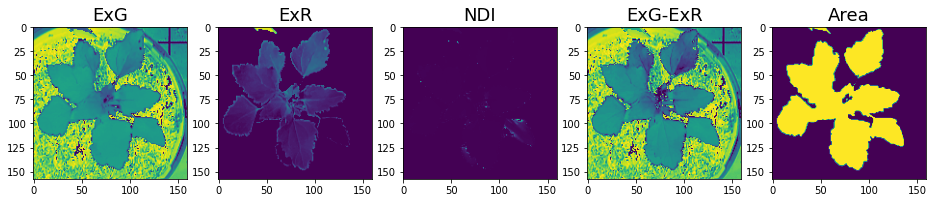

In [16]:
plt.figure(figsize=(16,16)); 
plt.subplot(151); plt.imshow(df['exg'][test_img]); plt.title('ExG',fontsize=18)
plt.subplot(152); plt.imshow(df['exr'][test_img]); plt.title('ExR',fontsize=18) 
plt.subplot(153); plt.imshow(df['ndi'][test_img]); plt.title('NDI',fontsize=18)
plt.subplot(154); plt.imshow(df['exg-exr'][test_img]); plt.title('ExG-ExR',fontsize=18)
plt.subplot(155); plt.imshow(df['area'][test_img]); plt.title('Area',fontsize=18)

In [17]:
print(df['exg'][test_img].shape)
print(df['exr'][test_img].shape)
print(df['ndi'][test_img].shape)
print(df['exg-exr'][test_img].shape)
print(df['mask'][test_img].shape)
print(df['origin'][test_img].shape)

(158, 160)
(158, 160)
(158, 160)
(158, 160)
(158, 160)
(158, 160, 3)


In [18]:
import imageio
from pathlib import Path
import pandas as pd
import sys
import cv2
import numpy as np

def get_VI(x):
    
    all_exg = []
    all_exr = []
    all_ndi = []
    all_exg_exr = []
    all_sumbinary = []
    all_image = []
    
    # Load images
    frgd = x['origin']
    mask = x['mask']
    exg = x['exg']
    exr = x['exr']
    ndi = x['ndi']
    exg_exr = x['exg-exr']
    
    # binary = np.where(mask > 100, 1, 0)
    binary = mask.astype(int)
    # Remove alpha layer and use mask to remape zero values
    frgd[:, :, 0:3][mask==0] = 0
    frgd = frgd[:,:,0:3]
    
    exg[mask==0] =0
    exr[mask==0] =0
    ndi[mask==0] =0
    exg_exr[mask==0] =0
    
    #exg[:, :][mask==0] = 0
    #exg = exg[:,:]
    #exr[:, :][mask==0] = 0
    #exr = exr[:,:]
    #ndi[:, :][mask==0] = 0
    #ndi = ndi[:,:]
    #exg_exr[:, :][mask==0] = 0
    #exg_exr = exg_exr[:,:]
    # Get sum of VIs of masked ROI
    all_exg=exg.sum()
    all_exr=exr.sum()
    all_ndi=ndi.sum()
    all_exg_exr=exg_exr.sum()
    all_sumbinary=binary.sum()
    #Get mean and std per VI
    m_exg, sd_exg = cv2.meanStdDev(exg)
    m_exr, sd_exr = cv2.meanStdDev(exr)
    m_ndi, sd_ndi = cv2.meanStdDev(ndi)
    m_exg_exr, sd_exg_exr = cv2.meanStdDev(exg_exr)
    print("Vector of features")
    print(all_exg, m_exg[0][0], sd_exg[0][0], all_exr, m_exr[0][0], sd_exr[0][0], all_ndi, m_ndi[0][0], sd_ndi[0][0], all_exg_exr, m_exg_exr[0][0], sd_exg_exr[0][0], all_sumbinary)
    stat_vector = np.array([all_exg, m_exg[0][0], sd_exg[0][0], all_exr, m_exr[0][0], sd_exr[0][0], all_ndi, m_ndi[0][0], sd_ndi[0][0], all_exg_exr, m_exg_exr[0][0], sd_exg_exr[0][0], all_sumbinary])
    #print(stat_vector)
    
    return stat_vector

df['stats']= df.apply(get_VI, axis=1)
#print(df['stats'][test_img])


Vector of features
874459 7.635462689694917 25.494095773349187 435066 3.7988404379791487 14.253661859149336 1837331.9019313806 16.04292389441171 77.30810265396065 875598 7.6454080296177285 33.18758714731286 2224708
Vector of features
491204 24.008015640273705 56.75525162287543 34733 1.697605083088954 7.917185246118866 686813.2064219285 33.56858291407283 85.68891093577584 470141 22.978543499511243 56.12459936594726 797440
Vector of features
1063644 9.830442055841552 27.48091969413886 590168 5.4544681558979295 16.459733637733997 2211031.0878866706 20.43485695696542 86.90865406808214 936668 8.656900710727456 34.81942280410707 2866445
Vector of features
4023699 54.03476801181763 57.63398764970251 1257517 16.88735647619687 20.730386981879594 6091071.605428543 81.79777889516005 169.3608066963173 3009847 40.41961995568388 50.344683034592165 8993165
Vector of features
8151830 54.35096843017635 65.13918726990732 748133 4.9880521385471885 8.459494876660111 12939377.59458293 86.27114441164763 165

In [19]:
df.head()

,date,time,week,row,stop,image,speciesid,commonname,annotation_file,mask_dir,...,disp_maps,histograms,histograms_map,origin,exg,exr,ndi,exg-exr,area,stats
no,,,,,,,,,,,,,,,,,,,,,
0,20210415,153241,wk4,row9,stop16,wk4_row9_stop16_20210415_153241_rgb.png,5.0,grass,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"[[[0, 0, 217], [0, 0, 217], [0, 0, 217], [0, 0...","([15826, 460, 490, 518, 589, 662, 684, 834, 89...","([195142, 1719, 1690, 1750, 2431, 2020, 2413, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[874459.0, 7.635462689694917, 25.4940957733491..."
1,20210414,101652,wk4,row1,stop1,wk4_row1_stop1_20210414_101652_rgb.png,0.0,clover,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"[[[0, 1, 65], [0, 9, 65], [0, 16, 176], [0, 7,...","([4056, 96, 79, 86, 108, 89, 111, 136, 182, 30...","([25315, 790, 692, 670, 650, 655, 772, 759, 10...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[491204.0, 24.008015640273705, 56.755251622875..."
2,20210415,152931,wk4,row9,stop12,wk4_row9_stop12_20210415_152931_rgb.png,5.0,grass,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"[[[0, 0, 221], [0, 0, 21], [0, 0, 180], [0, 0,...","([16516, 451, 453, 519, 598, 706, 762, 809, 95...","([171728, 1791, 2302, 2056, 3113, 2074, 2466, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1063644.0, 9.830442055841552, 27.480919694138..."
3,20210415,150825,wk4,row8,stop9,wk4_row8_stop9_20210415_150825_rgb.png,1.0,sunflower,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"[[[0, 0, 233], [0, 0, 233], [0, 0, 188], [0, 0...","([7501, 245, 310, 323, 343, 375, 471, 1104, 27...","([100736, 697, 647, 639, 820, 803, 985, 692, 9...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[4023699.0, 54.03476801181763, 57.633987649702..."
4,20210414,124844,wk4,row7,stop6,wk4_row7_stop6_20210414_124844_rgb.png,2.0,cowpea,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"[[[0, 17, 255], [0, 16, 255], [0, 14, 255], [0...","([14878, 497, 484, 470, 614, 667, 1222, 47456,...","([210032, 1195, 1130, 1051, 1367, 1078, 1311, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[8151830.0, 54.35096843017635, 65.139187269907..."


In [20]:
df.to_hdf('depth_slices_wk4_v2.h5', key='df')

d:\intel\openvino_notebooks\openvino_env\lib\site-packages\pandas\core\generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['week', 'row', 'stop', 'image', 'commonname', 'annotation_file',
       'mask_dir', 'image_file', 'image_dir', 'depth_dir', 'disp_map_dir',
       'annotations', 'depth_slices', 'mask', 'disp_maps', 'histograms',
       'histograms_map', 'origin', 'exg', 'exr', 'ndi', 'exg-exr', 'area',
       'stats'],
      dtype='object')]

  encoding=encoding,


In [21]:
pd.read_hdf('depth_slices_wk4_v2.h5')

,date,time,week,row,stop,image,speciesid,commonname,annotation_file,mask_dir,...,disp_maps,histograms,histograms_map,origin,exg,exr,ndi,exg-exr,area,stats
no,,,,,,,,,,,,,,,,,,,,,
0,20210415,153241,wk4,row9,stop16,wk4_row9_stop16_20210415_153241_rgb.png,5.0,grass,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"[[[0, 0, 217], [0, 0, 217], [0, 0, 217], [0, 0...","([15826, 460, 490, 518, 589, 662, 684, 834, 89...","([195142, 1719, 1690, 1750, 2431, 2020, 2413, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[874459.0, 7.635462689694917, 25.4940957733491..."
1,20210414,101652,wk4,row1,stop1,wk4_row1_stop1_20210414_101652_rgb.png,0.0,clover,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"[[[0, 1, 65], [0, 9, 65], [0, 16, 176], [0, 7,...","([4056, 96, 79, 86, 108, 89, 111, 136, 182, 30...","([25315, 790, 692, 670, 650, 655, 772, 759, 10...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[491204.0, 24.008015640273705, 56.755251622875..."
2,20210415,152931,wk4,row9,stop12,wk4_row9_stop12_20210415_152931_rgb.png,5.0,grass,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"[[[0, 0, 221], [0, 0, 21], [0, 0, 180], [0, 0,...","([16516, 451, 453, 519, 598, 706, 762, 809, 95...","([171728, 1791, 2302, 2056, 3113, 2074, 2466, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1063644.0, 9.830442055841552, 27.480919694138..."
3,20210415,150825,wk4,row8,stop9,wk4_row8_stop9_20210415_150825_rgb.png,1.0,sunflower,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"[[[0, 0, 233], [0, 0, 233], [0, 0, 188], [0, 0...","([7501, 245, 310, 323, 343, 375, 471, 1104, 27...","([100736, 697, 647, 639, 820, 803, 985, 692, 9...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[4023699.0, 54.03476801181763, 57.633987649702..."
4,20210414,124844,wk4,row7,stop6,wk4_row7_stop6_20210414_124844_rgb.png,2.0,cowpea,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"[[[0, 17, 255], [0, 16, 255], [0, 14, 255], [0...","([14878, 497, 484, 470, 614, 667, 1222, 47456,...","([210032, 1195, 1130, 1051, 1367, 1078, 1311, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[8151830.0, 54.35096843017635, 65.139187269907..."
5,20210414,114116,wk4,row4,stop4,wk4_row4_stop4_20210414_114116_rgb.png,0.0,clover,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"[[[0, 0, 179], [0, 0, 200], [0, 0, 151], [0, 0...","([3741, 164, 150, 164, 207, 241, 280, 302

In [22]:
import xlrd
location = "D:/Intel/openvino_notebooks/notebooks/501-depth-oakd/Oak-D2020 Biomass Datasheet.xls"
wb = xlrd.open_workbook(location)
sheet = wb.sheet_by_index(3)

In [23]:
df1=pd.read_excel("D:/Intel/openvino_notebooks/notebooks/501-depth-oakd/Oak-D2020 Biomass Datasheet.xls", 3)
print(df1)

    4  15  21   1  1.1   row1   stop1  0.051
0   4  15  21   1    2   row1   stop4  0.089
1   4  15  21   1    3   row1   stop9  0.104
2   4  15  21   1    4   row1  stop12  0.114
3   4  15  21   1    5   row1  stop16  0.047
4   4  15  21   2    1   row2   stop1  0.156
5   4  15  21   2    2   row2   stop4  0.108
6   4  15  21   2    3   row2   stop9  0.130
7   4  15  21   2    4   row2  stop12  0.112
8   4  15  21   2    5   row2  stop16  0.062
9   4  15  21   3    1   row3   stop1  0.057
10  4  15  21   3    2   row3   stop4  0.084
11  4  15  21   3    3   row3   stop9  0.068
12  4  15  21   3    4   row3  stop12  0.060
13  4  15  21   3    5   row3  stop16  0.030
14  4  15  21   4    1   row4   stop1  0.112
15  4  15  21   4    2   row4   stop4  0.156
16  4  15  21   4    3   row4   stop9  0.064
17  4  15  21   4    4   row4  stop12  0.009
18  4  15  21   4    5   row4  stop16  0.017
19  4  15  21   5    1   row5   stop1  0.060
20  4  15  21   5    2   row5     NaN    NaN
21  4  15 

In [24]:
xl = pd.ExcelFile("D:/Intel/openvino_notebooks/notebooks/501-depth-oakd/Oak-D2020 Biomass Datasheet.xls")
df2 = xl.parse("wk4", header=None, names=['Month', 'Day', 'Year', 'row1', 'pot', 'row', 'stop', 'biomass'])

In [25]:
df2.head()

,Month,Day,Year,row1,pot,row,stop,biomass
0,4,15,21,1,1,row1,stop1,0.051
1,4,15,21,1,2,row1,stop4,0.089
2,4,15,21,1,3,row1,stop9,0.104
3,4,15,21,1,4,row1,stop12,0.114
4,4,15,21,1,5,row1,stop16,0.047


In [26]:
for i in range(len(df)) :
    #print(df.loc[i, "row"], df.loc[i, "stop"])
    #df.loc[i, "Biomass"] = #pd.notnull
    try: 
        #print(pd.notnull(df2['biomass'].where((df2['row'] == df.loc[i, "row"]) & (df2['stop'] == df.loc[i, "stop"]))))
        df3=pd.notnull(df2['biomass'].where((df2['row'] == df.loc[i, "row"]) & (df2['stop'] == df.loc[i, "stop"])))
        #print(df3[df3 == True].index[0])
        df.loc[i, "Biomass"]=df2['biomass'][df3[df3 == True].index[0]]
    except:
        df.loc[i, "Biomass"]=None
        print("no biomass data")  

df.head()

no biomass data
no biomass data


,date,time,week,row,stop,image,speciesid,commonname,annotation_file,mask_dir,...,histograms,histograms_map,origin,exg,exr,ndi,exg-exr,area,stats,Biomass
no,,,,,,,,,,,,,,,,,,,,,
0,20210415,153241,wk4,row9,stop16,wk4_row9_stop16_20210415_153241_rgb.png,5.0,grass,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"([15826, 460, 490, 518, 589, 662, 684, 834, 89...","([195142, 1719, 1690, 1750, 2431, 2020, 2413, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[874459.0, 7.635462689694917, 25.4940957733491...",0.511
1,20210414,101652,wk4,row1,stop1,wk4_row1_stop1_20210414_101652_rgb.png,0.0,clover,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"([4056, 96, 79, 86, 108, 89, 111, 136, 182, 30...","([25315, 790, 692, 670, 650, 655, 772, 759, 10...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[491204.0, 24.008015640273705, 56.755251622875...",0.051
2,20210415,152931,wk4,row9,stop12,wk4_row9_stop12_20210415_152931_rgb.png,5.0,grass,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"([16516, 451, 453, 519, 598, 706, 762, 809, 95...","([171728, 1791, 2302, 2056, 3113, 2074, 2466, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1063644.0, 9.830442055841552, 27.480919694138...",0.390
3,20210415,150825,wk4,row8,stop9,wk4_row8_stop9_20210415_150825_rgb.png,1.0,sunflower,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"([7501, 245, 310, 323, 343, 375, 471, 1104, 27...","([100736, 697, 647, 639, 820, 803, 985, 692, 9...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[4023699.0, 54.03476801181763, 57.633987649702...",0.564
4,20210414,124844,wk4,row7,stop6,wk4_row7_stop6_20210414_124844_rgb.png,2.0,cowpea,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"([14878, 497, 484, 470, 614, 667, 1222, 47456,...","([210032, 1195, 1130, 1051, 1367, 1078, 1311, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[8151830.0, 54.35096843017635, 65.139187269907...",0.696


In [27]:
df.to_hdf('depth_slices_wk4_v2.h5', key='df')

d:\intel\openvino_notebooks\openvino_env\lib\site-packages\pandas\core\generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['week', 'row', 'stop', 'image', 'commonname', 'annotation_file',
       'mask_dir', 'image_file', 'image_dir', 'depth_dir', 'disp_map_dir',
       'annotations', 'depth_slices', 'mask', 'disp_maps', 'histograms',
       'histograms_map', 'origin', 'exg', 'exr', 'ndi', 'exg-exr', 'area',
       'stats'],
      dtype='object')]

  encoding=encoding,
